#Importing libraries and data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [51]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
ibm-hr-analytics-attrition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
!unzip ibm-hr-analytics-attrition-dataset.zip

Archive:  ibm-hr-analytics-attrition-dataset.zip
replace WA_Fn-UseC_-HR-Employee-Attrition.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [53]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_copy = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [54]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#Data Cleaning

Do any columns have missing values and if so, I will need to impute the values or drop the columns.

What are the data types of the columns and do any of them need to be converted to a different type?



In [55]:
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no null values and the data types all seem appropriate.

In [57]:
print(df['EmployeeCount'].value_counts())
print(df['Over18'].value_counts())
print(df['StandardHours'].value_counts())

EmployeeCount
1    1470
Name: count, dtype: int64
Over18
Y    1470
Name: count, dtype: int64
StandardHours
80    1470
Name: count, dtype: int64


There are some columns which seem like they are not useful so I will drop them.

EmployeeCount - This is useful for internal company measures but not needed for this analysis.

Over 18 - All employees were over 18 so it was redundant to keep the column

StandardHours - The figures were almost identicle between employees so it was also redundant,

In [58]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'], axis=1, inplace=True)

#EDA
I want to find out what the distribution of the data is

In [59]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Initial understanding of notable points in the data:

Age - Majority of employees are within working 'middle age', ie 30-40, with bulk in the mid-30s .

Distance from home - it appears most employees live fairly close to their place of work which is favourable.

Salary:
There is not much variation in salaries in both daily rate and monthly rate.

Working years and no. companies worked - most employees have been working for 10 years or less and most have only worked for one company prior.

Job involvement, level and Satisfaction - Most values are average (ie fall around 2 on a scale out of 4) so it appears most employees are mid-level, averagely involved and fairly satisfied about it.


##Quick visualisation overview

It is easier to understand the data through some visualisations as I can quickly get a sense of any trends and patterns.

The graphs are not exhaustive as it is meant as just an initial overview.

I have grouped the graphs into categories I feel make sense.

<ipython-input-156-86bcdf144f93>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90,ha='right')


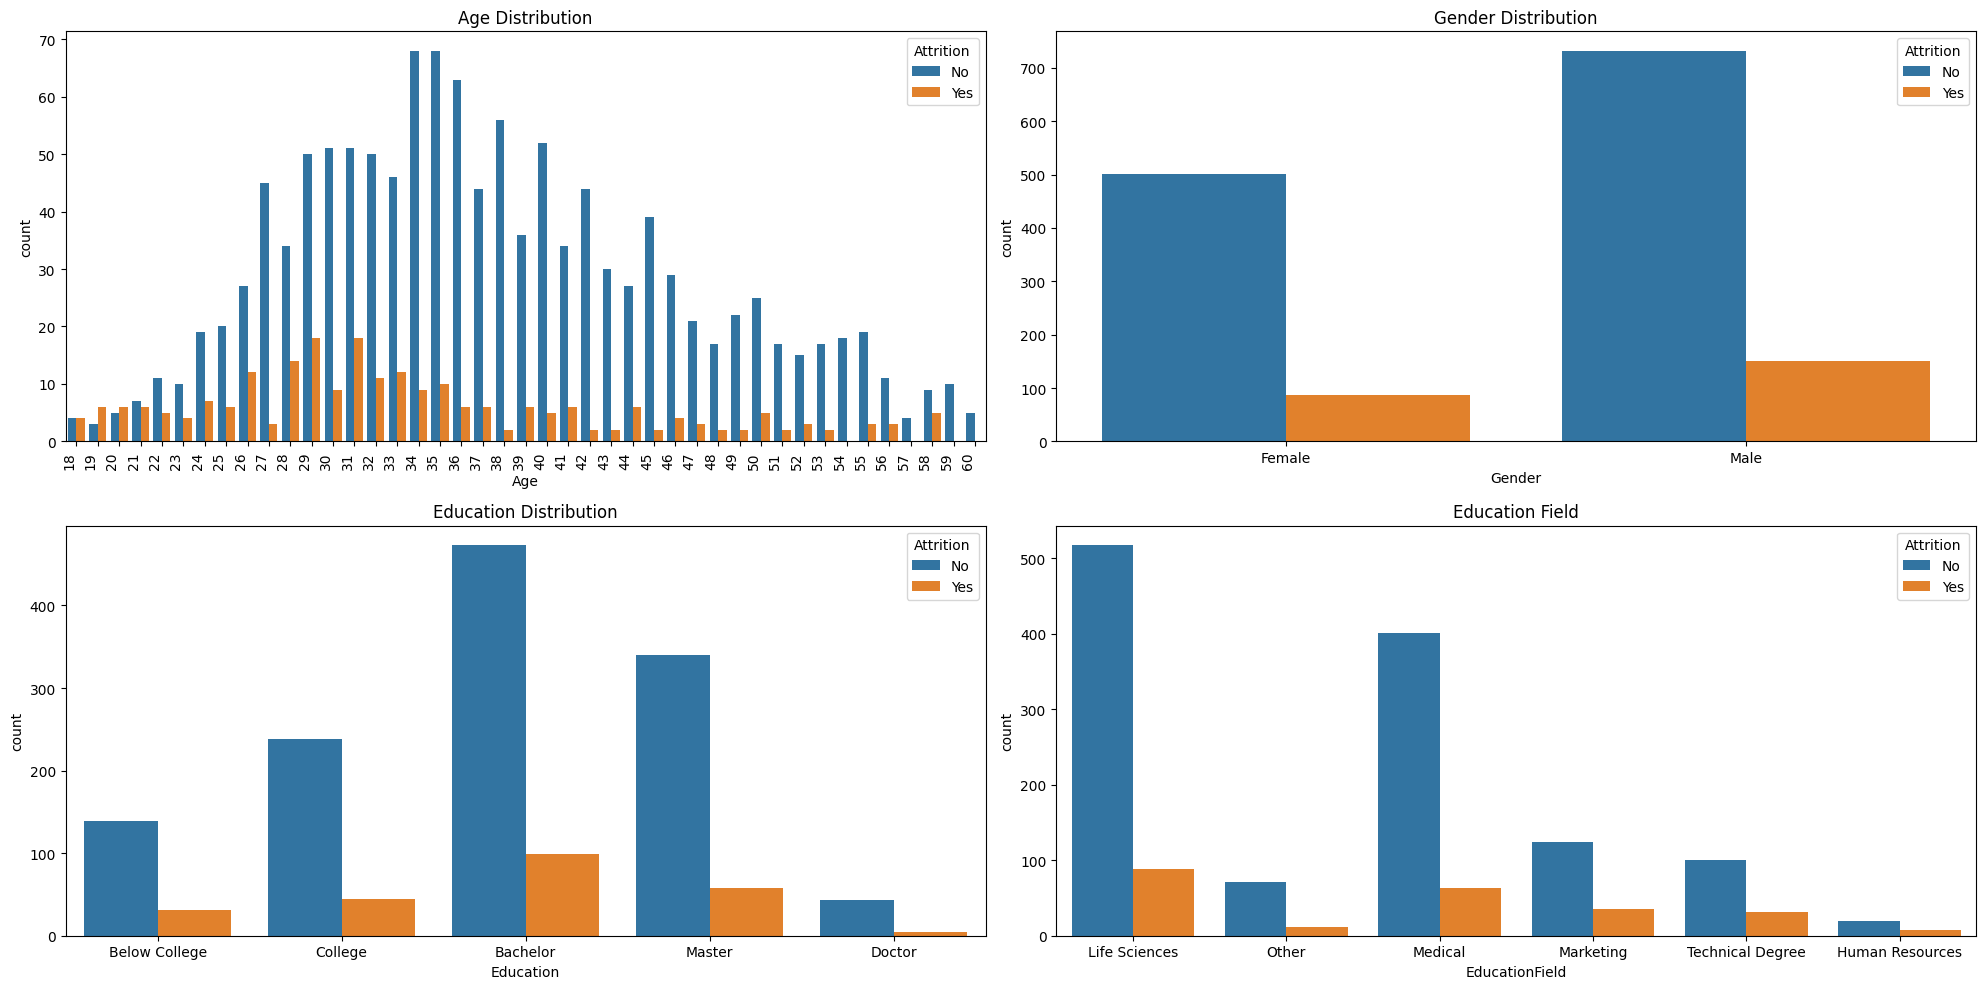

In [156]:
education={
1 :'Below College',
2 :'College',
3 :'Bachelor',
4 :'Master',
5 :'Doctor'}

worklife={
1 :'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}
sns.set_palette(sns.color_palette(["#1f77b4", "#ff7f0e"]))  # blue for "No", orange for "Yes"

fig, ax = plt.subplots(2, 2, figsize=(20, 10))



sns.countplot(x='Age', hue='Attrition', data=df,hue_order=['No','Yes'], ax=ax[0,0])
ax[0,0].set_title('Age Distribution')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90,ha='right')

sns.countplot(x='Gender', hue='Attrition', data=df,hue_order=['No','Yes'], ax=ax[0,1])
ax[0,1].set_title('Gender Distribution')

sns.countplot(x='Education', hue='Attrition', data=df,hue_order=['No','Yes'], ax=ax[1,0])
ax[1,0].set_title('Education Distribution')
ax[1,0].set_xticks(np.arange(5), education.values())

sns.countplot(x='EducationField', hue='Attrition', data=df,hue_order=['No','Yes'], ax=ax[1,1])
ax[1,1].set_title('Education Field')


plt.tight_layout()
plt.show()

Age:
The peak attrition appears to be in the low 30s (30,32) while the retention peaks around 35, 36, 37.

Gender:
There is a higher attrition rate in males than females but I don't know the distribution between the number of male and female employees so it's something to analyse later on.

Education:
Most employees have a bachelors which is not surprising given the type of company and required skills to work there.

Education field:
It's interesting that the highest retention rate is from Life Sciences background and not a technical degree.

<ipython-input-62-a333157d9348>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=40,ha='right')


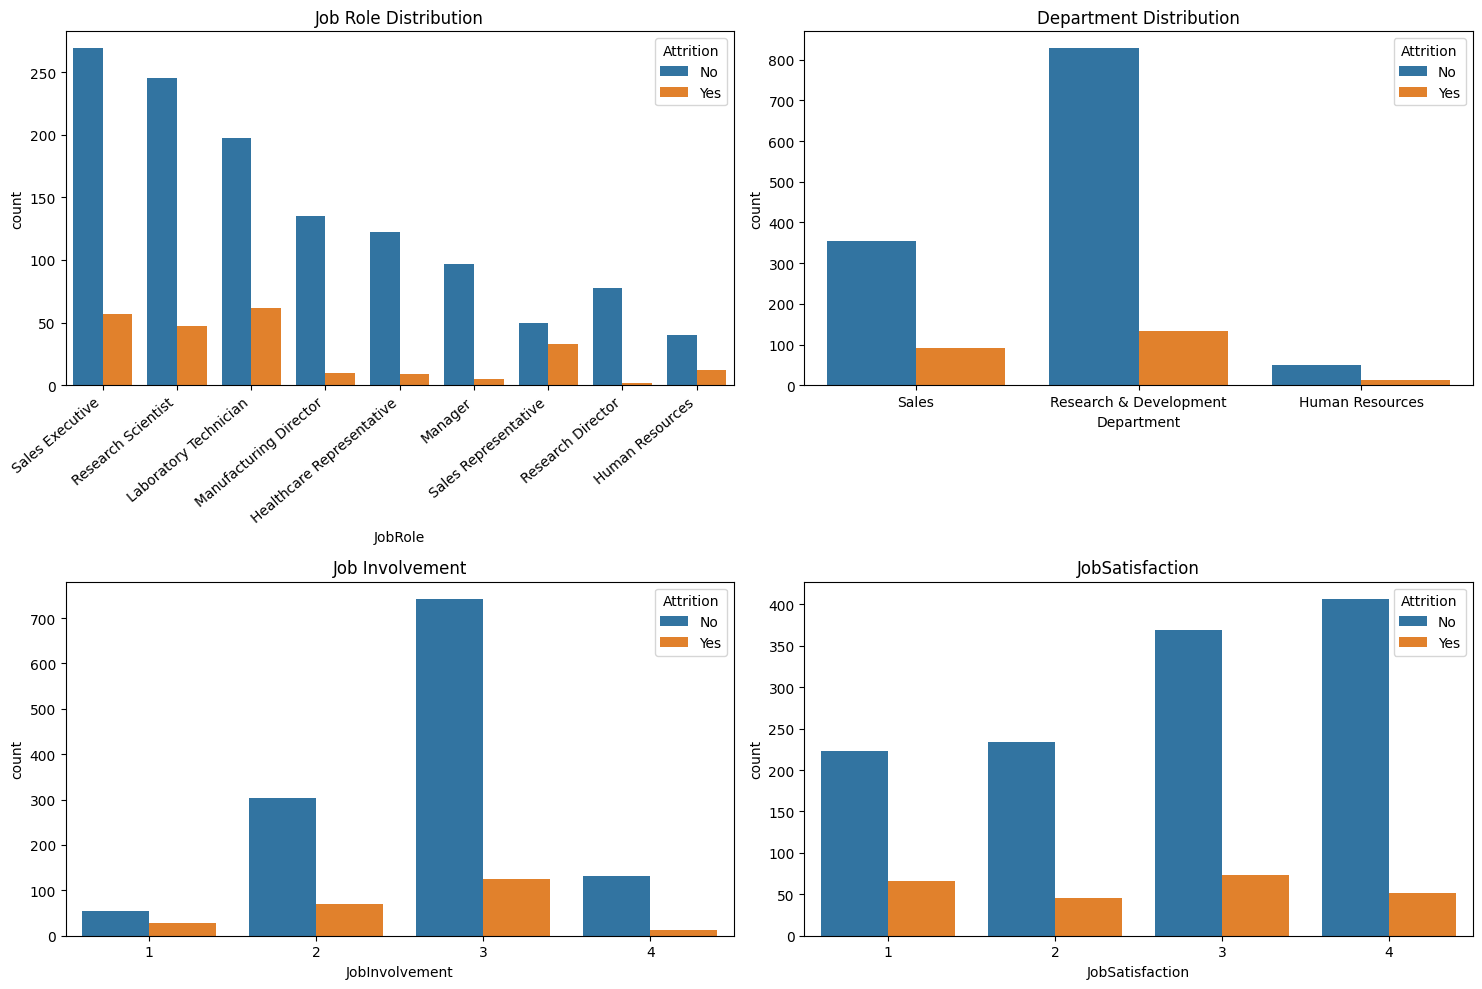

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='JobRole', hue='Attrition', data=df,hue_order=['No','Yes'], ax=ax[0,0])
ax[0,0].set_title('Job Role Distribution')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=40,ha='right')

sns.countplot(x='Department', hue='Attrition', data=df,hue_order=['No','Yes'], ax=ax[0,1])
ax[0,1].set_title('Department Distribution')

sns.countplot(x='JobInvolvement', hue='Attrition', data=df,hue_order=['No','Yes'], ax=ax[1,0])
ax[1,0].set_title('Job Involvement')

sns.countplot(x='JobSatisfaction', hue='Attrition', data=df,hue_order=['No','Yes'], ax=ax[1,1])
ax[1,1].set_title('JobSatisfaction')


plt.tight_layout()
plt.show()

Job Role:
Sales-executives have the highest retention but almost match lab-technician on attrition. Lab technicians seem to have the smallest spread between attrition. Perhaps it is a very demanding job.

Department:
R&D and Sales are fairly close in attrition although R&D far outperforms in maintaining employees. This is surprising given that Sales Executives retention rates are fairly high.

Job involvement:
The jump in retention between 2 and 3 indicates there must be a sweet spot where employees feel like they are making a positive contributing without getting burnt out.

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

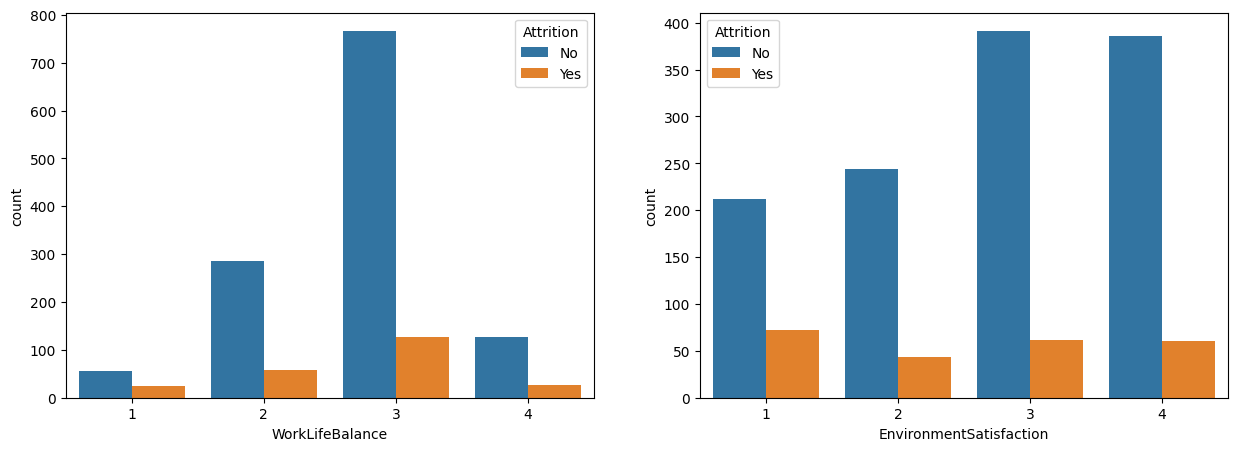

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df,hue_order=['No','Yes'],ax=ax[0])

sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df,hue_order=['No','Yes'], ax=ax[1])

Work life balance:
As with job involvement, there is a sweet spot where employees are much more likely to stay at the company. It is strange that as work-life balance increases, the rentention rate doesn't increase.

Environment Satisfaction:
Environment satisfaction attrition rate actually stays fairly consistent across all the ratings but retention rate increases a lot at 3 and falls slightly at 4. Again it's surprising that the retention rate increases substantially between 1 and 3 and then decreases to 4.

#Data preprocessing

I will encode and standardise the categorical variables for easier analysis later on

In [64]:
pd.set_option('display.max_columns', None)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [66]:
le = LabelEncoder()
df_processed = df[['MaritalStatus','OverTime','Gender','Attrition','BusinessTravel','Department','EducationField','JobRole']].copy()
df_processed['MaritalStatus_p'] = le.fit_transform(df['MaritalStatus'])
df_processed['OverTime_p'] = le.fit_transform(df['OverTime'])
df_processed['Gender_p'] = le.fit_transform(df['Gender'])
df_processed['Attrition_p'] = le.fit_transform(df['Attrition'])
df_processed['BusinessTravel_p'] = le.fit_transform(df['BusinessTravel'])
df_processed['Department_p'] = le.fit_transform(df['Department'])
df_processed['EducationField_p'] = le.fit_transform(df['EducationField'])
df_processed['JobRole_p'] = le.fit_transform(df['JobRole'])
#df_processed.drop(['MaritalStatus','OverTime','Gender','Attrition','BusinessTravel','Department','EducationField','JobRole'], axis=1, inplace=True)

In [68]:
scaler = StandardScaler()

df_processed['normalised_monthly_income'] = scaler.fit_transform(df['MonthlyIncome'].values.reshape(-1, 1))
df_processed['normalised_monthly_rate'] = scaler.fit_transform(df['MonthlyRate'].values.reshape(-1, 1))
df_processed['normalised_age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df_processed['normalised_distance'] = scaler.fit_transform(df['DistanceFromHome'].values.reshape(-1, 1))

In [69]:
df_processed.head()

,MaritalStatus,OverTime,Gender,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus_p,OverTime_p,Gender_p,Attrition_p,BusinessTravel_p,Department_p,EducationField_p,JobRole_p,normalised_monthly_income,normalised_monthly_rate,normalised_age,normalised_distance
0,Single,Yes,Female,Yes,Travel_Rarely,Sales,Life Sciences,Sales Executive,2,1,0,1,2,2,1,7,-0.108350,0.726020,0.446350,-1.010909
1,Married,No,Male,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,1,0,1,0,1,1,1,6,-0.291719,1.488876,1.322365,-0.147150
2,Single,Yes,Male,Yes,Travel_Rarely,Research & Development,Other,Laboratory Technician,2,1,1,1,2,1,4,2,-0.937654,-1.674841,0.008343,-0.887515
3,Married,Yes,Female,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,1,1,0,0,1,1,1,6,-0.763634,1.243211,-0.429664,-0.764121
4,Married,No,Male,No,Travel_Rarely,Research & Development,Medical,Laboratory Technician,1,0,1,0,2,1,3,2,-0.644858,0.325900,-1.086676,-0.887515


In [73]:
full_df = pd.concat([df, df_processed], axis=1)
full_df.to_csv('full_df.csv', index=False)

#Correlation and trend analysis

I'd like to see if there are any noticeable correlations between the variabels and attrition rates. I've split up the graphs into different categories so it's easier to digest.

## Matrix 1: Demographics and work history

<Axes: >

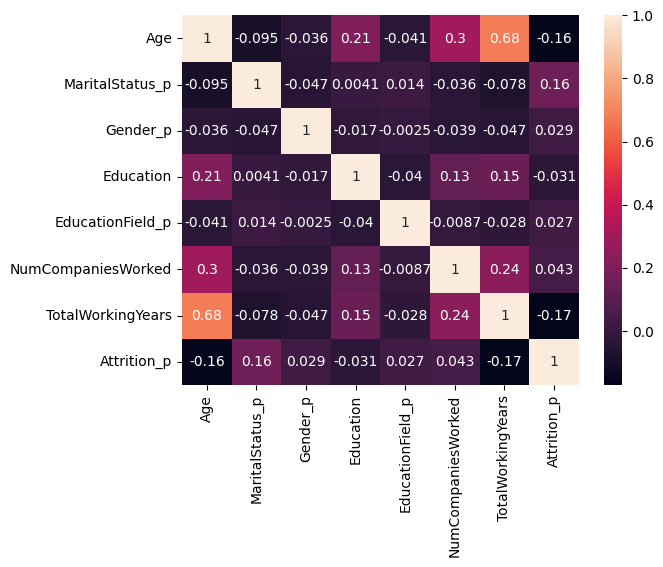

In [81]:
#y_variable = 'Attrition'
corr = full_df[['Age','MaritalStatus_p','Gender_p', 'Education','EducationField_p','NumCompaniesWorked','TotalWorkingYears','Attrition_p']].corr()
heatmap_data = pd.DataFrame(corr)
sns.heatmap(heatmap_data.T, annot=True)

## Matrix 2: Job Characteristics

<Axes: >

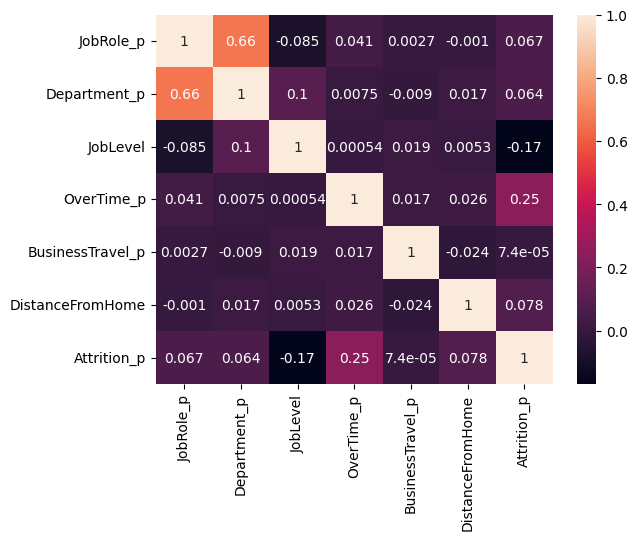

In [84]:
corr = full_df[['JobRole_p','Department_p','JobLevel','OverTime_p','BusinessTravel_p','DistanceFromHome','Attrition_p']].corr()
heatmap_data = pd.DataFrame(corr)
sns.heatmap(heatmap_data.T, annot=True)

## Matrix 3: Compensation and Benefits

<Axes: >

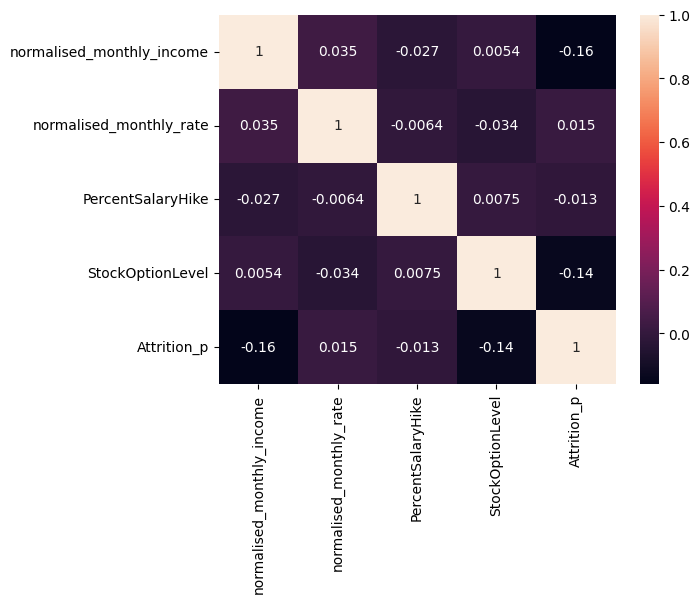

In [86]:
corr = full_df[['normalised_monthly_income', 'normalised_monthly_rate','PercentSalaryHike','StockOptionLevel','Attrition_p']].corr()
heatmap_data = pd.DataFrame(corr)
sns.heatmap(heatmap_data.T, annot=True)

## Matrix 4: Job Satisfaction and performance

<Axes: >

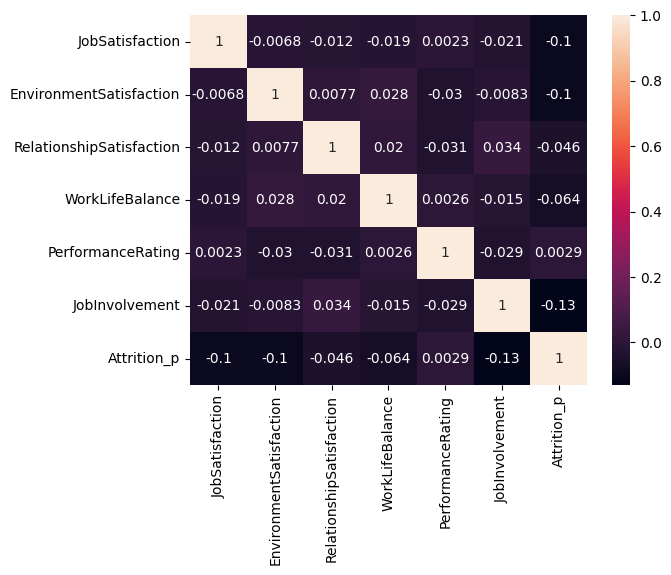

In [89]:
corr=full_df[['JobSatisfaction','EnvironmentSatisfaction','RelationshipSatisfaction','WorkLifeBalance','PerformanceRating','JobInvolvement','Attrition_p']].corr()
heatmap_data = pd.DataFrame(corr)
sns.heatmap(heatmap_data.T, annot=True)

## Matrix 5: Career progression

<Axes: >

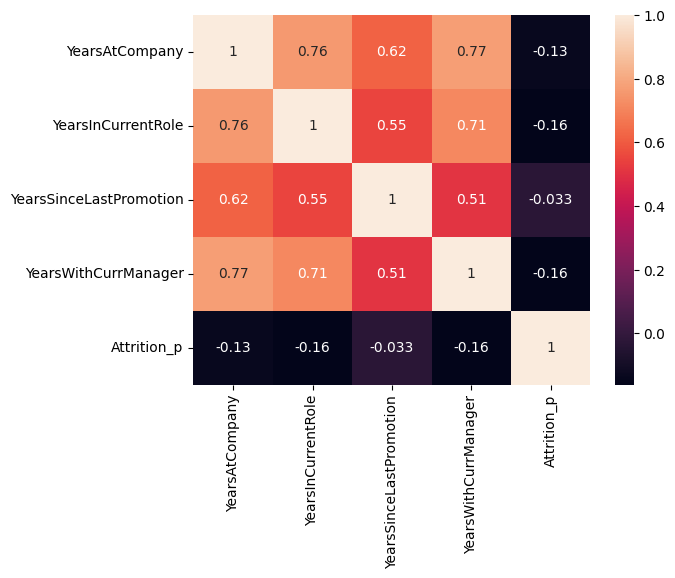

In [92]:
corr=full_df[['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition_p']].corr()
heatmap_data = pd.DataFrame(corr)
sns.heatmap(heatmap_data.T, annot=True)


There were no insightful correlations in the groupings above, besides for Career progression related variables like YearsInCurrentRole and YearsAtCompany. These are intuitive and don't offer much insight when looking at attrition.

Since there we no significant correlations in the groups as I expected there to be, I wanted to get an overview of the whole dataset so I looked at the correlations in the different format. It is not as pretty as a heatmap but it is easier to scan over the numbers (by setting the sensitivity of the highlights) and see any correlations that I may have missed.

In [157]:
import pandas as pd


numerical_columns = full_df.select_dtypes(include=['number']).columns

correlation_matrix = full_df[numerical_columns].corr()

filtered_corr = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1.0)]
print(filtered_corr)


def highlight_strong_correlations(val):
    color = ''
    if 1 < val > 0.4:
        color = 'background-color: darkgreen'
    elif val < -0.2:
        color = 'background-color: lightcoral'
    return color


correlation_matrix.style.applymap(highlight_strong_correlations)


                                Age  DailyRate  DistanceFromHome  Education  \
Age                             NaN        NaN               NaN        NaN   
DailyRate                       NaN        NaN               NaN        NaN   
DistanceFromHome                NaN        NaN               NaN        NaN   
Education                       NaN        NaN               NaN        NaN   
EnvironmentSatisfaction         NaN        NaN               NaN        NaN   
HourlyRate                      NaN        NaN               NaN        NaN   
JobInvolvement                  NaN        NaN               NaN        NaN   
JobLevel                   0.509604        NaN               NaN        NaN   
JobSatisfaction                 NaN        NaN               NaN        NaN   
MonthlyIncome                   NaN        NaN               NaN        NaN   
MonthlyRate                     NaN        NaN               NaN        NaN   
NumCompaniesWorked              NaN        NaN      

<ipython-input-157-da9658440c7a>:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  correlation_matrix.style.applymap(highlight_strong_correlations)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus_p,OverTime_p,Gender_p,Attrition_p,BusinessTravel_p,Department_p,EducationField_p,JobRole_p,normalised_monthly_income,normalised_monthly_rate,normalised_age,normalised_distance
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.095029,0.028062,-0.036311,-0.159205,0.024751,-0.031882,-0.040873,-0.122427,0.497855,0.028051,1.000000,-0.001686
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.069586,0.009135,-0.011716,-0.056652,-0.004086,0.007109,0.037709,-0.009472,0.007707,-0.032182,0.010661,-0.004985
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.014437,0.025514,-0.001851,0.077924,-0.024469,0.017225,0.002013,-0.001015,-0.017014,0.027473,-0.001686,1.000000
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.004053,-0.020322,-0.016547,-0.031373,0.000757,0.007996,-0.039592,0.004236,0.094961,-0.026084,0.208034,0.021042
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.003593,0.070132,0.000508,-0.103369,0.004174,-0.019395,0.043163,-0.017321,-0.006259,0.037600,0.010146,-0.016075
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.017861,-0.007782,-0.000478,-0.006846,0.026528,-0.004144,-0.021941,-0.018861,-0.015794,-0.015297,0.024287,0.031131
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.038497,-0.003507,0.017960,-0.130016,0.039062,-0.024586,-0.002655,0.006616,-0.015271,-0.016322,0.029820,0.008783
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.076769,0.000544,-0.039403,-0.169105,0.019311,0.101963,-0.044933,-0.085457,0.950300,0.039563,0.509604,0.005303
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,0.024360,0.024539,0.033252,-0.103481,-0.033962,0.021001,-0.034401,0.017537,-0.007157,0.000644,-0.004892,-0.003669
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.075450,0.006089,-0.031858,-0.159840,0.034319,0.053130,-0.041070,-0.093951,1.000000,0.034814,0.497855,-0.017

##Conclusion:

There does not seem to be any noteworhy correlations in the data that would provide meaningful insight. This extends to the correlations between the variables and attrition as no variable had a signifacnt correlation with the attrition rate.

There was a negative correlation between Marital Status and Stock Option Level.
After encoding, the categories are Divorced-0, Single-1, Married-2 which means that Divorced employees have the highest stock option level with married having the lowest. I'm not sure why this might be the case.

#Visualisations on attrition

<ipython-input-166-f30efbc3d475>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])


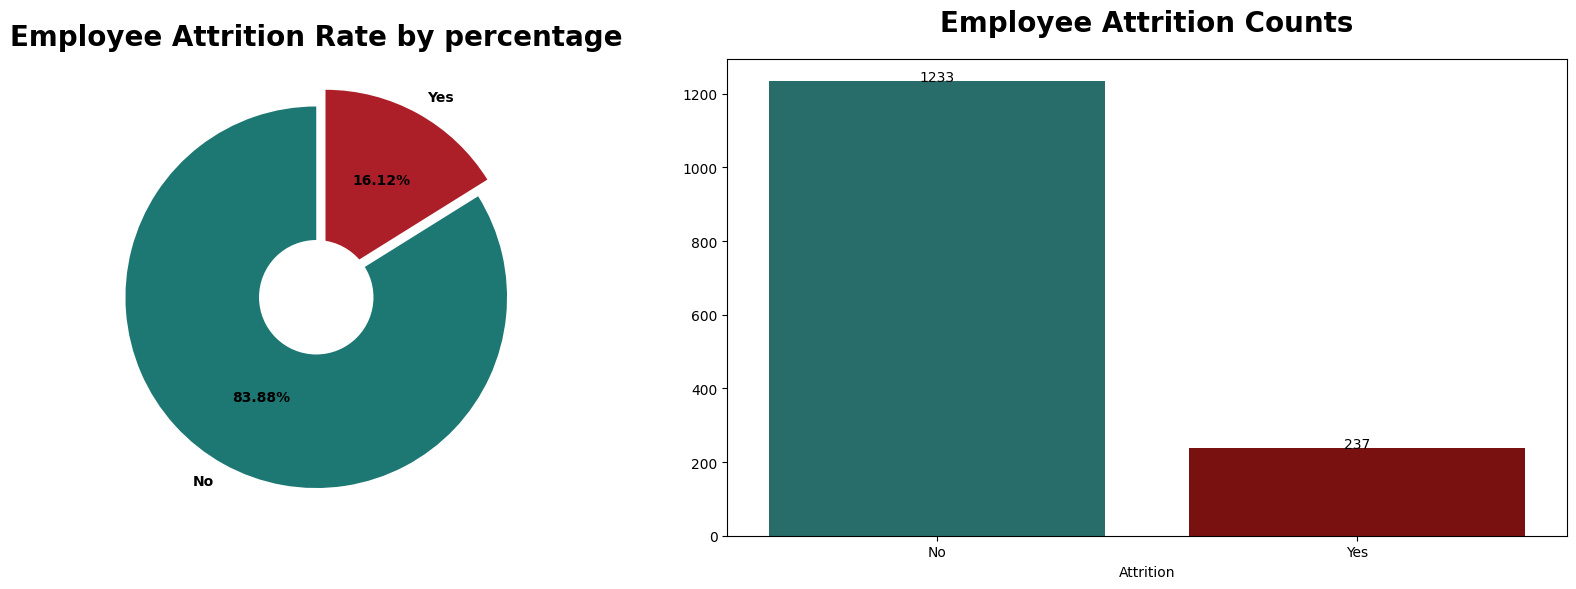

In [166]:
plt.figure(figsize=(17,6))


#Calculating attrition rate
attrition_rate = df["Attrition"].value_counts()

#Bar plot
plt.subplot(1,2,2)
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center",  fontsize=10)

#Pie chart
plt.subplot(1,2,1)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":10},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate by percentage",fontweight="black", size=20,pad=10)

plt.tight_layout()
plt.show()


Attrition by gender

<ipython-input-174-b0acadc52cd8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_attrition.index, y=gender_attrition.values,palette=["#ffb563","#FFC0CB"])
<ipython-input-174-b0acadc52cd8>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",


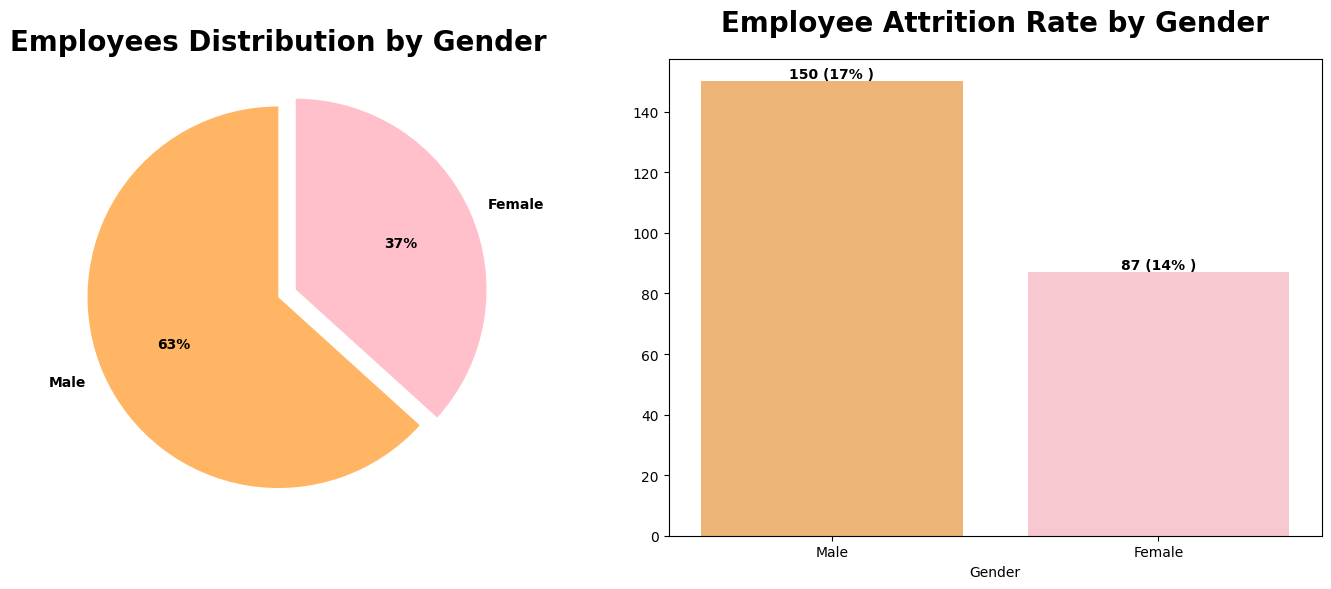

In [174]:
plt.figure(figsize=(14,6))

#Calculating attrition rates
gender = df["Gender"].value_counts()
gender_attrition = df[df["Attrition"]=='Yes']["Gender"].value_counts()
attrition_rate = (gender_attrition/gender)*100

#Pie chart
plt.subplot(1,2,1)
plt.title("Employees Distribution by Gender",fontweight="black",size=20)
plt.pie(gender_attrition, autopct="%.0f%%",labels=gender_attrition.index,textprops=({"fontweight":"black","size":10}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])


#Visualization to show Employee Attrition by Gender.
plt.subplot(1,2,2)
sns.barplot(x=gender_attrition.index, y=gender_attrition.values,palette=["#ffb563","#FFC0CB"])
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(gender_attrition):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=10,fontweight="black")


plt.tight_layout()
plt.show()

The company is male dominated so it follows that there is a higher male turnover. It is noteworthy that there are 20% more men but only 3% higher attrition rate. The male dominated culture is something the company could look into for higher female retention.

#Attrition by age

<ipython-input-176-26760ff9765c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attrition"],y=df["Age"],palette=["#ffb563","#4682B4"])


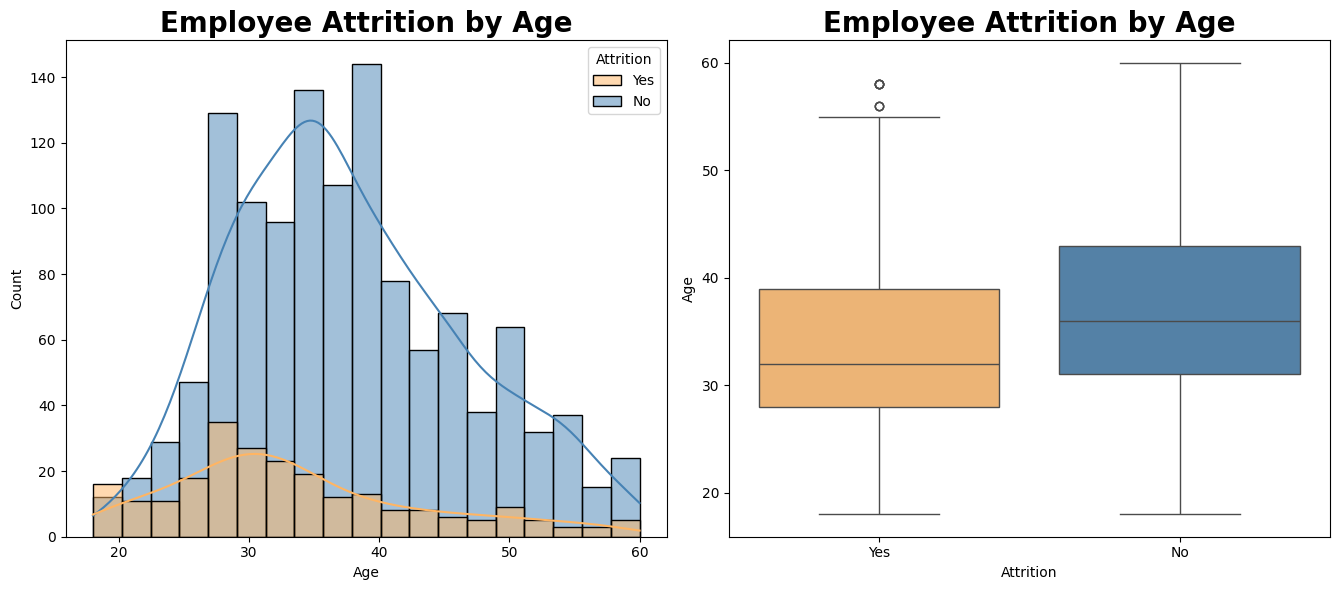

In [176]:
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x=df["Age"],hue=df['Attrition'],kde=True,palette=["#ffb563","#4682B4"])
plt.title("Employee Attrition by Age",fontweight="black",size=20)

plt.subplot(1,2,2)
sns.boxplot(x=df["Attrition"],y=df["Age"],palette=["#ffb563","#4682B4"])
plt.title("Employee Attrition by Age",fontweight="black",size=20)
plt.tight_layout()
plt.show()

As age increases, the attrition rate decreases as seen in the orange KDE. The median age of those that left the company is lower than those that remained so it is fair to assume that younger people are more likely to leave a job.

#Attrition by Education

<ipython-input-189-c4216d0cc9a9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education.index,y=education.values, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
<ipython-input-189-c4216d0cc9a9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index,y=attrition_counts.values, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


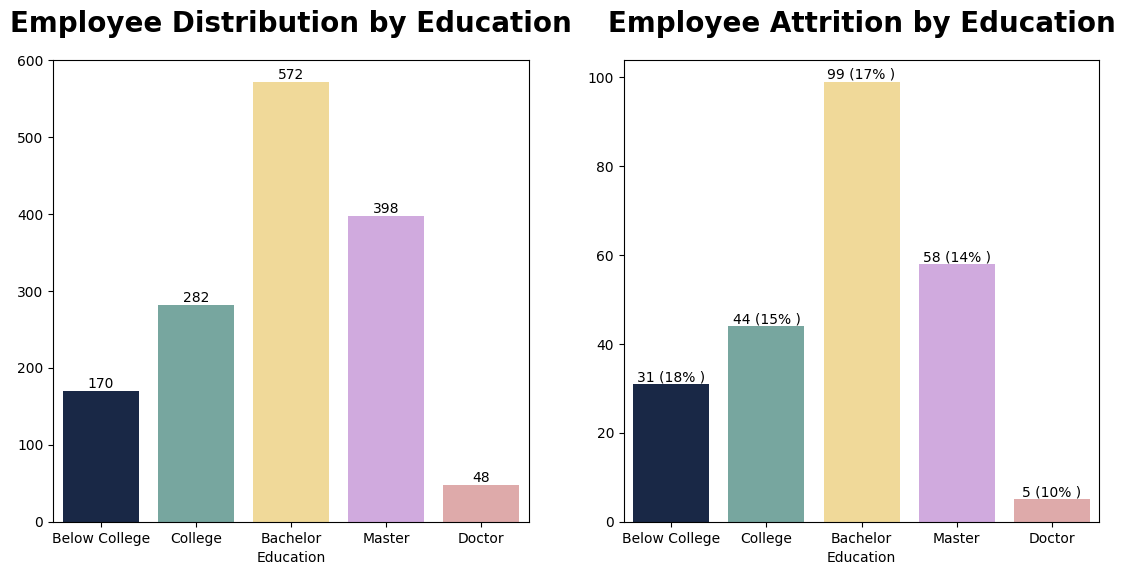

In [189]:
labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
education = df['Education'].value_counts().reindex([1,2,3,4,5])

plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.barplot(x=education.index,y=education.values, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Distribution by Education",fontweight="black",size=20,pad=20)

for index,value in enumerate(education):
    plt.text(index,value,str(value),ha="center",va="bottom",size=10)
plt.xticks(np.arange(5), labels)

education_counts = df["Education"].value_counts()
attrition_counts = df[df["Attrition"] == 'Yes']["Education"].value_counts()
attrition_rate = (attrition_counts / education_counts) * 100
#attrition_rate=attrition_rate.sort_values(ascending=False)


plt.subplot(1,2,2)
sns.barplot(x=attrition_counts.index,y=attrition_counts.values, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition by Education",fontweight="black",size=20,pad=20)
plt.xticks(np.arange(5), labels)
for index,value in attrition_counts.items():
    plt.text(index - 1, value, str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=10)





plt.show()

My initial analysis was incorrect regarding bachelors having the highest attrition. It is infact below college that has the highest attrition rate.

As education level increases, the attrition rate decreases. This may be explained as more qualified employees are recruited for more specialised roles which corresponds to higher compensation, more satisfaction etc.

<ipython-input-191-48915eb2019b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=travel_attrition.index,y=travel_attrition.values, palette=["#ffb563","#4682B4","#D4A1E7"])
<ipython-input-191-48915eb2019b>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index,value,str(value)+" ("+str(int(travel_rate[index]))+"% )",ha="center",va="bottom",


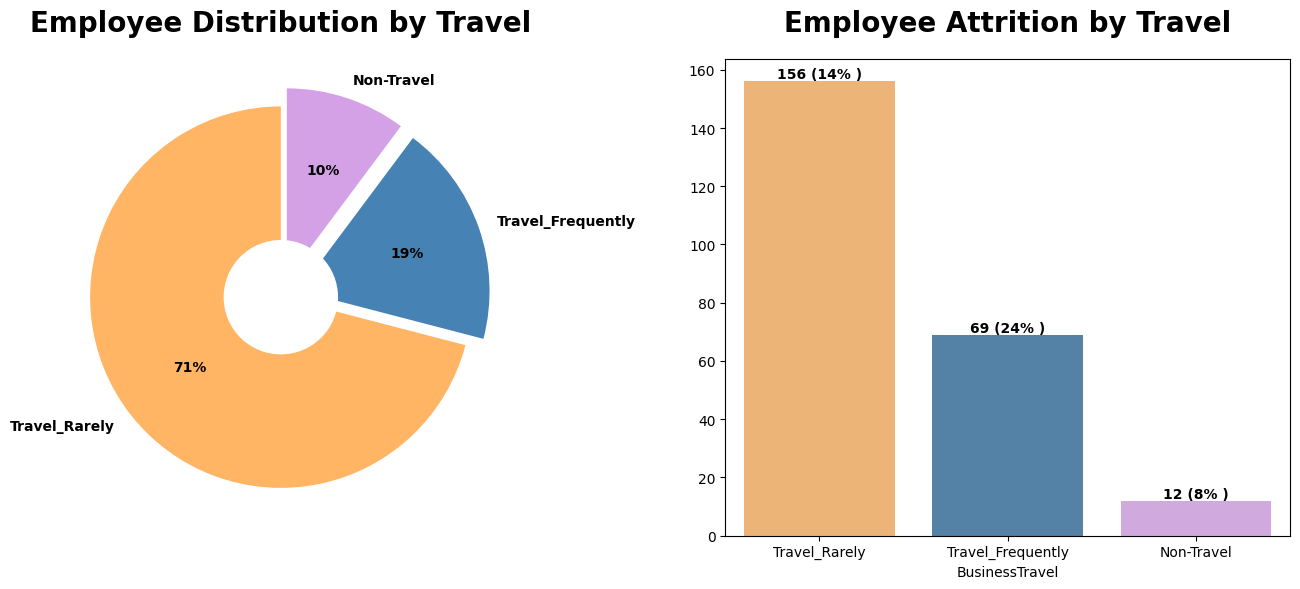

In [191]:
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)

#Calculate the attrition rates
travel = df['BusinessTravel'].value_counts()
travel_attrition = df[df['Attrition']=='Yes']['BusinessTravel'].value_counts()
travel_rate = (travel_attrition/travel)*100
#travel_rate = travel_rate.sort_values(ascending=False)

#Pie chart
plt.pie(travel.values, autopct="%.0f%%",labels=travel.index,textprops=({"fontweight":"black","size":10}),
        explode=[0,0.1,0.1],startangle=90, colors=["#ffb563","#4682B4","#D4A1E7"])
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Distribution by Travel",fontweight="black",size=20,pad=20)

#Bar chart
plt.subplot(1,2,2)
ax=sns.barplot(x=travel_attrition.index,y=travel_attrition.values, palette=["#ffb563","#4682B4","#D4A1E7"])
plt.title("Employee Attrition by Travel",fontweight="black",size=20,pad=20)
for index,value in enumerate(travel_attrition):
    plt.text(index,value,str(value)+" ("+str(int(travel_rate[index]))+"% )",ha="center",va="bottom",
             size=10,fontweight="black")


plt.tight_layout()
plt.show()

It seems that Business travel does have a significant impact on attrition as those who travel frequently are more prone to leaving. High amounts of travel impacts work-life balance and is something the company should be more cognisant of.

#Attrition by job and department


<ipython-input-100-fae2667c5810>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_attrition.index,y=department_attrition.values, palette=["#ffb563","#4682B4","#D4A1E7"])
<ipython-input-100-fae2667c5810>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index,value,str(value)+" ("+str(int(department_rate[index]))+"% )",ha="center",va="bottom",


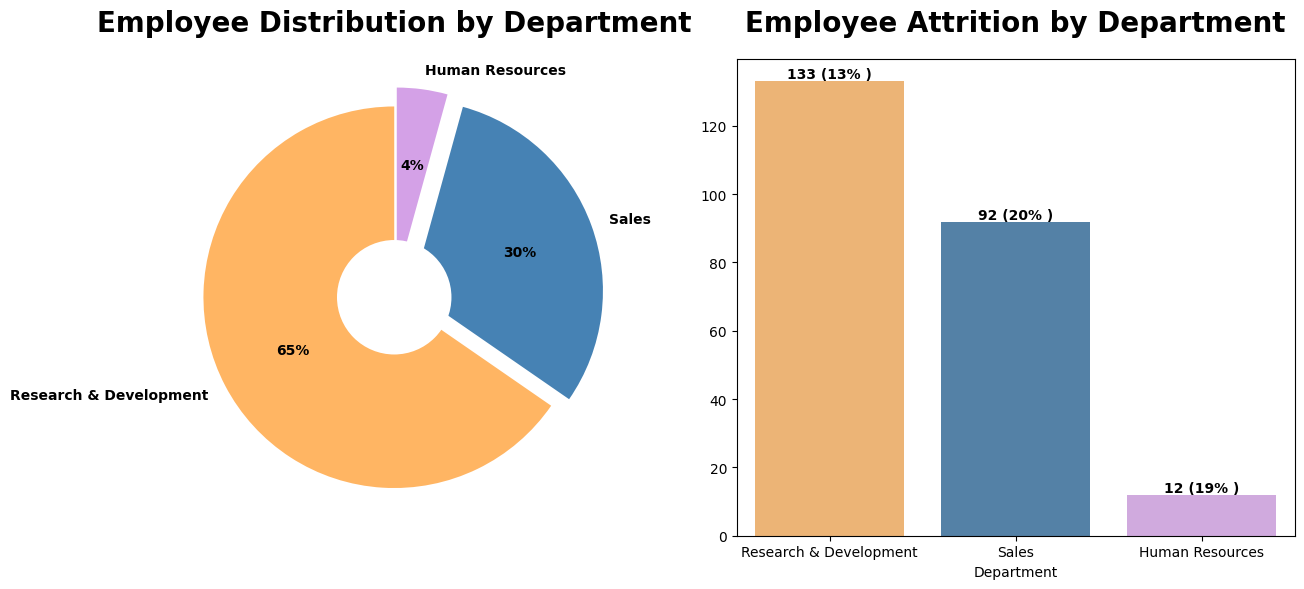

In [100]:
fig = plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)

#Attrition rate
department =df_copy['Department'].value_counts()
department_attrition = df[df['Attrition']=='Yes']['Department'].value_counts()
department_rate = (department_attrition/department)*100

#Plot 1: Num employees per dep.
plt.pie(department.values, autopct="%.0f%%",labels=department.index,textprops=({"fontweight":"black","size":10}),
        explode=[0,0.1,0.1],startangle=90, colors=["#ffb563","#4682B4","#D4A1E7"])
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Distribution by Department",fontweight="black",size=20,pad=20)

#Plot 2: attrition rate per dep.
plt.subplot(1,2,2)
sns.barplot(x=department_attrition.index,y=department_attrition.values, palette=["#ffb563","#4682B4","#D4A1E7"])
plt.title("Employee Attrition by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(department_attrition):
    plt.text(index,value,str(value)+" ("+str(int(department_rate[index]))+"% )",ha="center",va="bottom",
             size=10,fontweight="black")

plt.tight_layout()
plt.show()

The Sales department has the highest turnover even though it's the second largest department.

Speculatively, salesmen are more likely to travel for work and, as mentioned above, high rates of work travel have higher attrition so this is something the company can look into. Sales may also have younger employees with lower levels of education which all correlates to higher attrition rates.

#Attrition by job

<ipython-input-102-a220e44b48cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['JobRole'].value_counts().index, y=df['JobRole'].value_counts().values, palette=["#ffb563","#4682B4",'#D4A1E7'])
<ipython-input-102-a220e44b48cf>:11: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df['JobRole'].value_counts().index, y=df['JobRole'].value_counts().values, palette=["#ffb563","#4682B4",'#D4A1E7'])
<ipython-input-102-a220e44b48cf>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_attrition.index,y=job_attrition.values, palette=["#ffb563","#4682B4","#D4A1E7"])
<ipython-input-102-a220e44b48cf

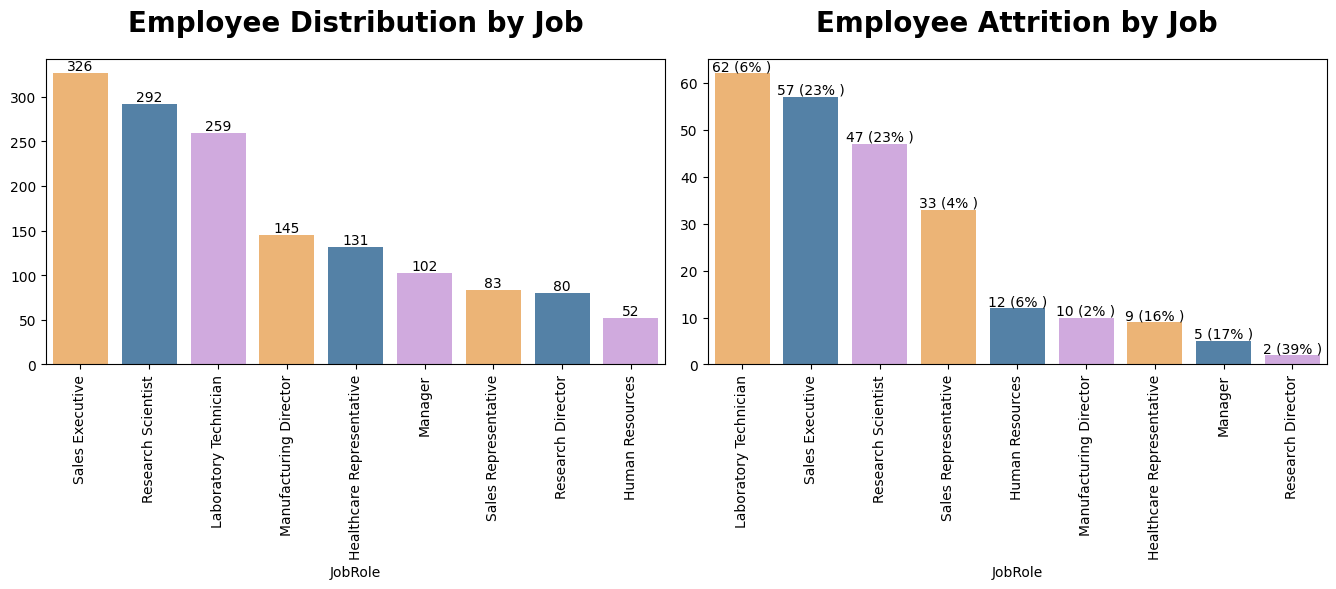

In [102]:
fig = plt.figure(figsize=(13.5,6))


#Attrition rate
job =df['JobRole'].value_counts()
job_attrition = df[df['Attrition']=='Yes']['JobRole'].value_counts()
job_rate = (job_attrition/job)*100

#barplot 1: Num employees per dep.
plt.subplot(1,2,1)
sns.barplot(x=df['JobRole'].value_counts().index, y=df['JobRole'].value_counts().values, palette=["#ffb563","#4682B4",'#D4A1E7'])
for index,value in enumerate(df['JobRole'].value_counts().values):
    plt.text(index,value,str(value),ha="center",va="bottom",size=10)
plt.title("Employee Distribution by Job",fontweight="black",size=20,pad=20)
plt.xticks(rotation=90)

#Plot 2: attrition rate per dep.
plt.subplot(1,2,2)
sns.barplot(x=job_attrition.index,y=job_attrition.values, palette=["#ffb563","#4682B4","#D4A1E7"])
for index,value in enumerate(job_attrition):
    plt.text(index,value,str(value)+" ("+str(int(job_rate[index]))+"% )",ha="center",va="bottom",
             size=10)
plt.title("Employee Attrition by Job",fontweight="black",size=20,pad=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()




Research director has an abnormally high attrition rate, more than double the company-wide rate. Sales executive and Research scientist are the next highest.

These roles are all more senior and are costly to the company to have high turnover.

#Attrition by job level and involvement

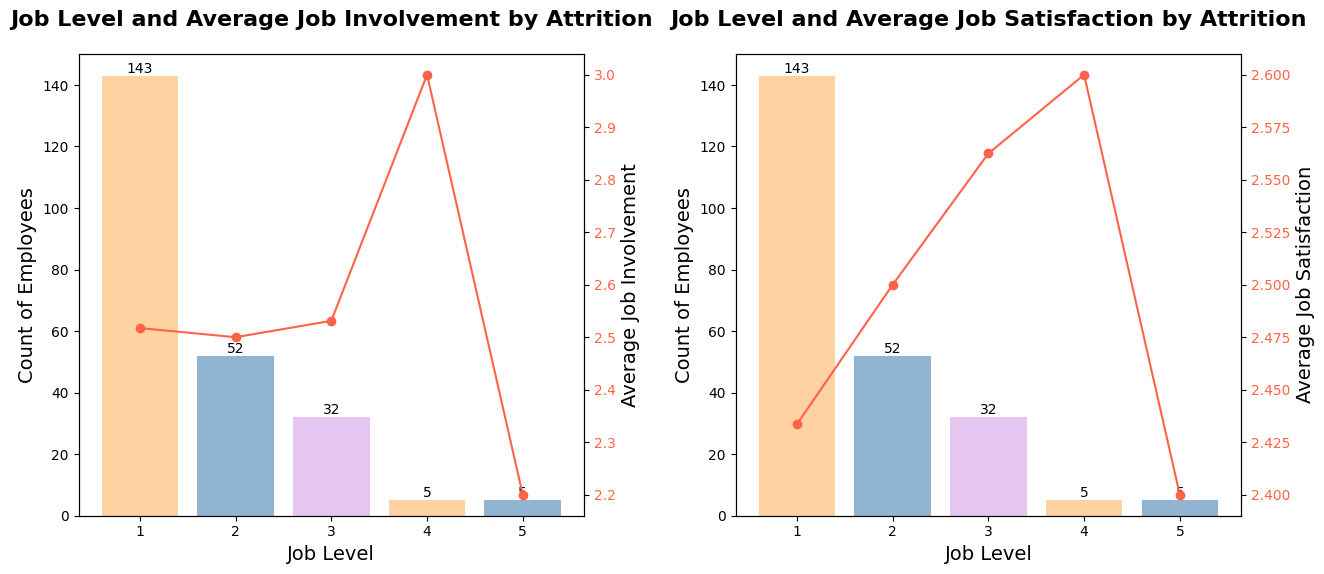

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

df_attrition = df[df['Attrition'] == 'Yes']

# Job Involvement and Job Satisfaction by Job Level
job_involvement_avg = df_attrition.groupby('JobLevel')['JobInvolvement'].mean()
job_satisfaction_avg = df_attrition.groupby('JobLevel')['JobSatisfaction'].mean()

# Count of employees by Job Level
job_level_count = df_attrition['JobLevel'].value_counts().sort_index()

fig = plt.figure(figsize=(15, 6))  # Slightly reduced size

# Subplot 1: Job Level and Average Job Involvement
ax1 = plt.subplot(1, 2, 1)
ax1.bar(job_level_count.index, job_level_count.values, color=["#ffb563", "#4682B4", "#D4A1E7"], alpha=0.6)
ax1.set_xlabel('Job Level', fontsize=14)
ax1.set_ylabel('Count of Employees', fontsize=14)
ax1.tick_params(axis='y')
for index, value in enumerate(job_level_count.values):
    ax1.text(index + 1, value, str(value), ha='center', va='bottom', fontsize=10)

# Line graph for job involvement
ax2 = ax1.twinx()
ax2.plot(job_involvement_avg.index, job_involvement_avg.values, color="#FF6347", marker='o')
ax2.set_ylabel('Average Job Involvement', fontsize=14)
ax2.tick_params(axis='y', labelcolor="#FF6347")
ax1.set_title("Job Level and Average Job Involvement by Attrition", fontweight="black", size=16, pad=20)

# Subplot 2: Job Level and Average Job Satisfaction
ax3 = plt.subplot(1, 2, 2)
ax3.bar(job_level_count.index, job_level_count.values, color=["#ffb563", "#4682B4", "#D4A1E7"], alpha=0.6)
ax3.set_xlabel('Job Level', fontsize=14)
ax3.set_ylabel('Count of Employees', fontsize=14)
ax3.tick_params(axis='y')
for index, value in enumerate(job_level_count.values):
    ax3.text(index + 1, value, str(value), ha='center', va='bottom', fontsize=10)

#Line graph for job satisfaction
ax4 = ax3.twinx()
ax4.plot(job_satisfaction_avg.index, job_satisfaction_avg.values, color="#FF6347", marker='o')
ax4.set_ylabel('Average Job Satisfaction', fontsize=14)
ax4.tick_params(axis='y',labelcolor="#FF6347")
ax3.set_title("Job Level and Average Job Satisfaction by Attrition", fontweight="black", size=16, pad=20)


plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()


I wanted to see if there was a relationship between job level, job involvement and the attrtition rate.

Job level and involvement:
As Job level increases, average involvement increases, peaking at level 4, before dropping to almost 0 at level 5.

A similar trend is seen with job satisfaction as satisfaction increases, albeit more linearly than involvement, with job level until level 5 where it drops to almost 0 again.

Since lower level employees are more likely to be younger (ie more likely to leave), there could be a link between how involved they are and job satisfaction resulting in attrition.

#Attrition by compensation


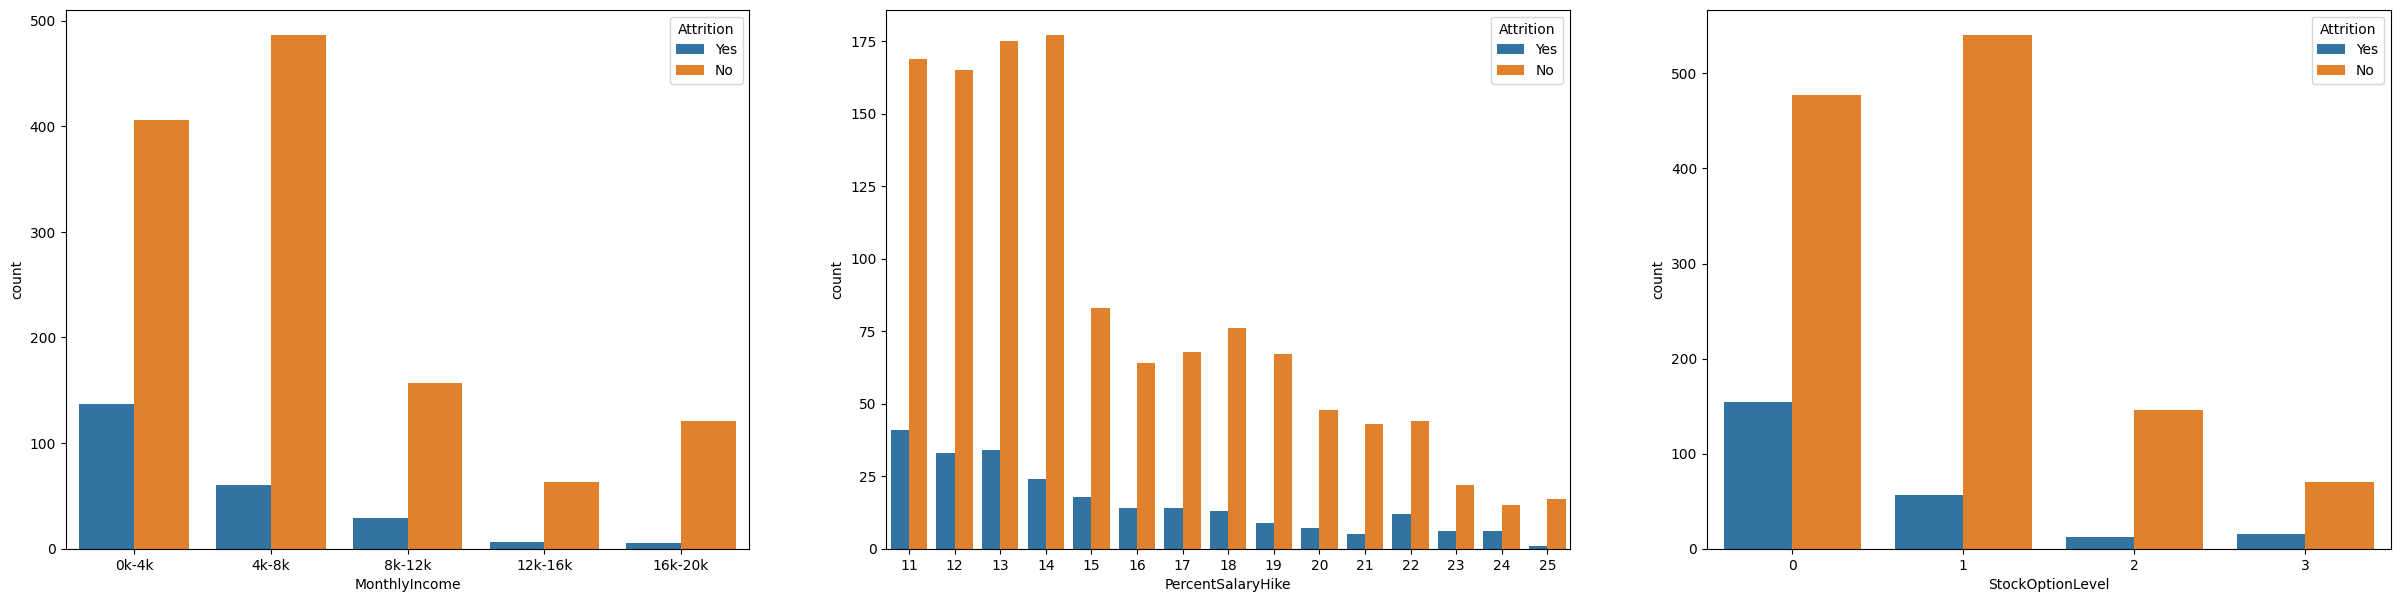

In [197]:
fig=plt.figure(figsize=(30,7))

df_attrition = df[df['Attrition']=='Yes']

bins = [0,4000,8000,12000,16000,20000]
labels = ['0k-4k','4k-8k','8k-12k','12k-16k','16k-20k']
income_bins = pd.cut(df['MonthlyIncome'], bins=bins,labels=labels)
plt.subplot(1,3,1)
sns.countplot(x=income_bins, hue='Attrition', data=df)


plt.subplot(1,3,2)
sns.countplot(x=df['PercentSalaryHike'], hue='Attrition', data=df)

plt.subplot(1,3,3)
sns.countplot(x=df['StockOptionLevel'], hue='Attrition', data=df)

plt.show()

Across all 3 graphs you can that as salary increases, attrition decreases. Simply put, the more you pay someone the more likely they are to be happy and continue working.

Retention also decreases as compensation increases indicating that highly-compensated employees begin to have other priorities that determine if they will stay or leave a company.

#Maritial status and work life balance

<ipython-input-155-770c24cf6ed5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=married_attrition.index, y=married_attrition.values, palette=["#ffb563","#4682B4","#D4A1E7"])


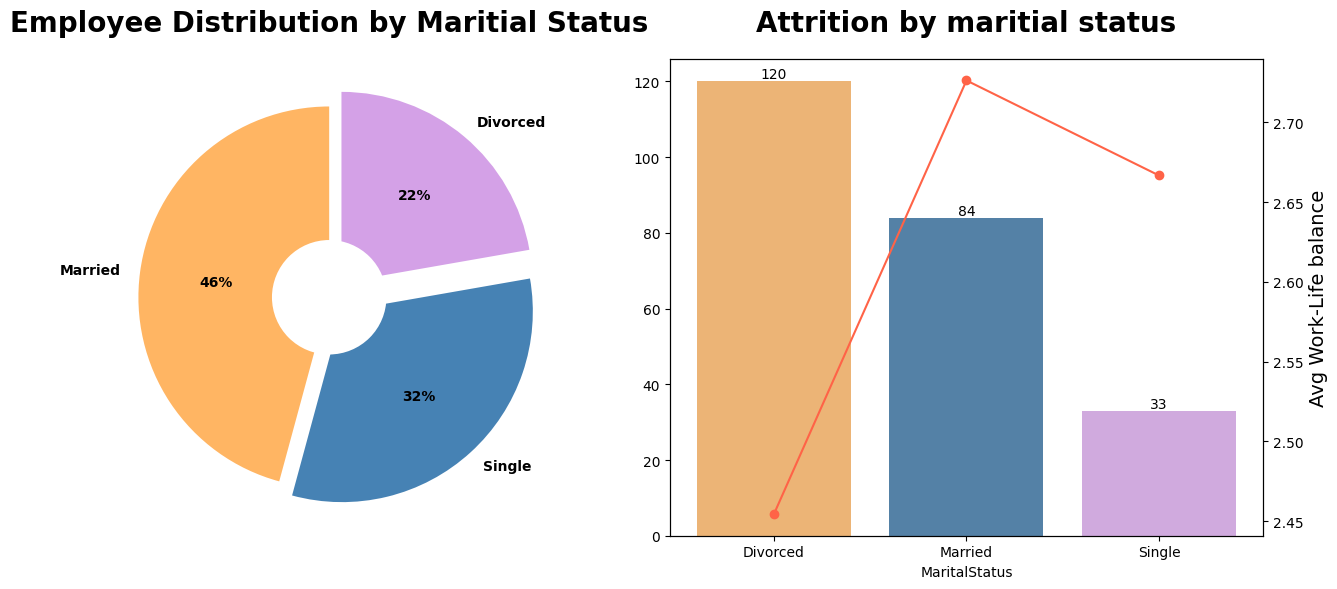

In [155]:
fig = plt.figure(figsize=(13.5,6))

married = df['MaritalStatus'].value_counts()
married_attrition = df[df['Attrition']=='Yes']['MaritalStatus'].value_counts()
married_rate = (married_attrition/married)*100

worklifebalance_avg = df_attrition.groupby('MaritalStatus')['WorkLifeBalance'].mean()


plt.subplot(1,2,1)
plt.pie(married.values, autopct="%.0f%%",labels=married.index,textprops=({"fontweight":"black","size":10}),
        explode=[0,0.1,0.1],startangle=90, colors=["#ffb563","#4682B4","#D4A1E7"])
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Distribution by Maritial Status",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
sns.barplot(x=married_attrition.index, y=married_attrition.values, palette=["#ffb563","#4682B4","#D4A1E7"])
for index,value in enumerate(married_attrition.values):
    plt.text(index,value,str(value),ha="center",va="bottom",size=10)
plt.title('Attrition by maritial status', fontweight="black", size=20, pad=20)

ax2 = plt.gca().twinx()
ax2.plot(worklifebalance_avg.index, worklifebalance_avg.values, color="#FF6347", marker='o')
ax2.set_ylabel('Avg Work-Life balance', fontsize=14)

plt.tight_layout()
plt.show()

While Marital Status is not something within company control, it is interesting to see the relationship to work life balance.

Married employees have the best work-life balance and divorced employees have the worst. The reasons are not clear without speculation but from the companies perspective, it can provide insight into predicting the likelihood of an employee leaving or not.

#Conclusion


Through analysing the visualisations we can infer a few points that may help the company with the attrition rate.

1. According to some sources, average attrition in tech sits around 13%. An attrition rate for IBM is 16%, making it above average although not concerningly high.

2. Younger employees have higher attrition and while males have a higher rate than females, it is only 3% higher. Given the large disparity of 20% between the number of male and female employees in IBM, there may be a culture problem that needs addressing.

3. Employees below a college level degree are most likely to leave, closely followed by those with a bachelors. IBM is a tech company, first and foremost, so perhaps there are not as many rewarding jobs for those without the relevant qualifications.

4. Business travel has a large negative impact on attrition and should be managed carefully.

5. Most employees sit in R&D but sales has highest rate of attrition. The company should investigate why the imbalance.

6. The roles with highest turnover are all more senior and thus would be costly to keep replacing. Along with the departments, the company should look into these individual jobs.

7. Up until job level 4, involvement and satisfaction increases. Level 5 sees both measures drop to almost 0 which is concerning. It is unclear if involvement leads to satisfaction or vice-versa but senior employees are valuable and the company should investigate why this trend exists.

8. Attrition decreases as compensation increases, this is intuitive. Perhaps the company could work on stock options for lower level employees as an increased incentive.

9. Marital status may be a feature in predicting attrition given the pattern viewed in the chart. It is not in the companies control but it may be important to be aware of.